In [1]:
from environment.fogg_behavioural_model import Patient 
from stable_baselines3.common.env_checker import check_env
import pandas as pd
from matplotlib import pyplot as plt
from stable_baselines3 import PPO

In [2]:
env1 = Patient()
env_info1 = {'behaviour_threshold': 20, 'has_family':True}
env1.env_init(env_info1)

In [3]:
# check_env(env1)

In [4]:
len(env1.valence_list)

24

In [5]:
len(env1.arousal_list)

24

In [6]:
len(env1.motion_activity_list)

24

In [7]:
len(env1.awake_list)

24

In [8]:
def to_num(w, keword):
    if w == keword:
        return 1
    else:
        return 0

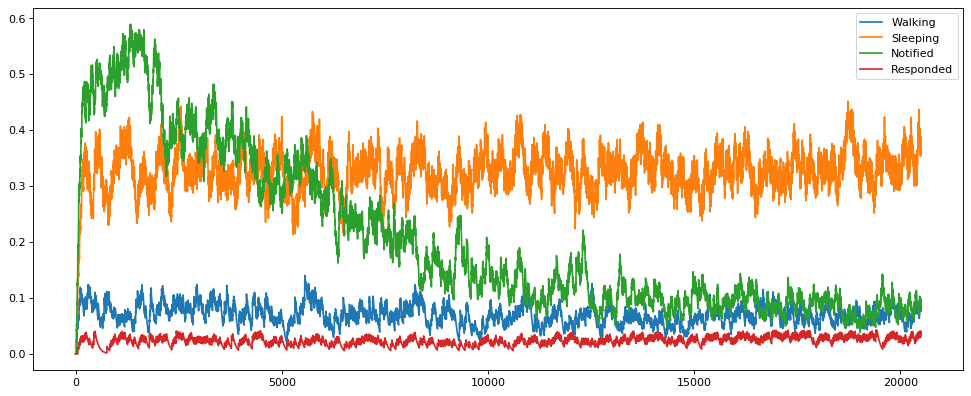

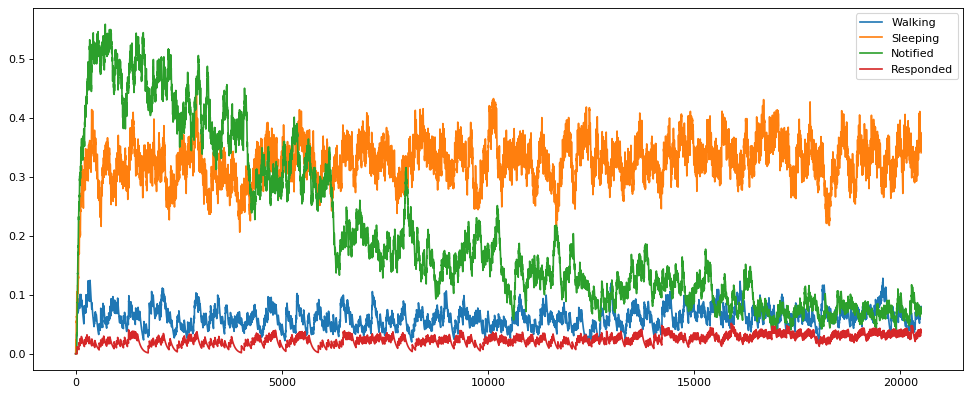

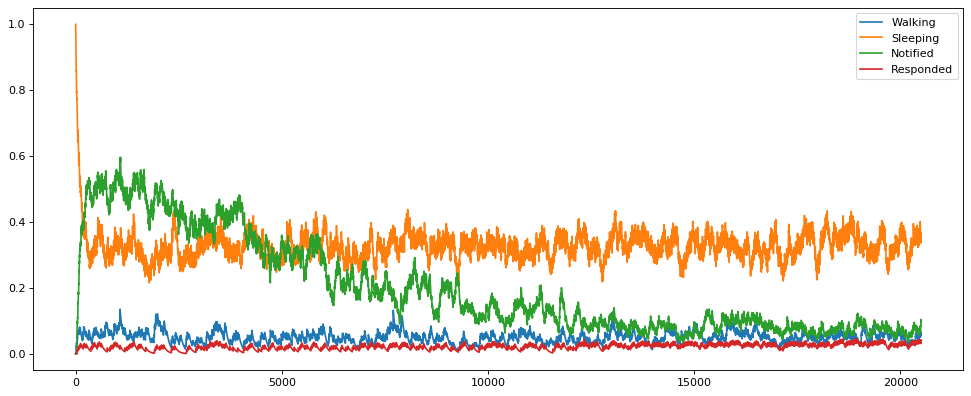

In [ ]:
for run in range(0, 100):
    
    env1 = Patient()
    env_info1 = {'behaviour_threshold': 20, 'has_family':True}
    env1.env_init(env_info1)
    model = PPO("MlpPolicy", env1, verbose=0, tensorboard_log="./patient1_tensorboard/")
    model.learn(total_timesteps=20000)
    model.save("patient1_run{0}".format(run))
    sleep = [to_num(w, 'sleeping') for w in env1.awake_list]
    walk = [to_num(w, 'walking') for w in env1.motion_activity_list]
    df = pd.DataFrame()
    df['sleep'] = sleep
    df['valence'] = env1.valence_list
    df['arousal'] = env1.arousal_list
    df['walking'] = walk
    df['notifications'] =env1.activity_suggested
    df['reponse_notifications'] =env1.activity_performed
    
    df.to_csv("patient1_run{0}.csv".format(run))
    week = 7*24
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(df.walking.ewm(span=week, adjust=False).mean(), label='Walking')
    plt.plot(df.sleep.ewm(span=week, adjust=False).mean(), label='Sleeping')
    plt.plot(df.notifications.ewm(span=week, adjust=False).mean(), label='Notified')
    plt.plot(df.reponse_notifications.ewm(span=week, adjust=False).mean(), label='Responded')
    plt.legend()
    plt.show()

In [7]:
len(env1.valence_list)

34618

In [9]:
len(env1.awake_list)

20504

In [6]:
env1.observation_space

MultiDiscrete([4 2 2 2 2 2 2 2 2 3 2 2 2])

In [6]:
obs = env1.reset()
x = []
y = []
for i in range(0,100):
    x.append(obs)
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env1.step(action)
    y.append(rewards)

In [7]:
y

[0.0,
 20,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20,
 0.0,
 0.0,
 0.0,
 0.0,
 20,
 0.0,
 0.0,
 0.0,
 -1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]